# Laboratorio 5 Grupal.
### Nombres:
###          - Aramayo Valdez Joaquin.
###          - Piza Nava Vladimir.
###          - Viza Hoyos Maria Belen.
###          - Mendoza Ovando Carlos Saul.
###          - Solorzano Diego.
### Link Dataset: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset?select=list_eval_partition.csv



## PUNTO 1 :
#### 1.   Modificar el generador de dataset aleatorio, para que este pueda generar centroides en cantidades entre 1 y 10, y considerando una importante distancia entre ellos con la finalidad de permitir la verificación visual una vez se realice el entrenamiento del modelo.
#### 2.   Modificar y adecuar todos los códigos para su respectivo aplicación y demostración de la efectividad del modelo.


In [1]:
import numpy as np

def generate_centroids(num_centroids, spread=5):
    centroids = []  # Lista para almacenar los centroides generados
    for _ in range(num_centroids):
        # Genera un nuevo centroide aleatorio
        while True:
            new_centroid = np.random.rand(2) * spread  # Genera un punto aleatorio en 2D
            # Verifica que el nuevo centroide esté a más de 1.5 unidades de los ya generados
            if all(np.linalg.norm(new_centroid - np.array(c)) > 1.5 for c in centroids):
                centroids.append(new_centroid)  # Añade el nuevo centroide a la lista
                break  # Sale del bucle si el centroide es válido
    return np.array(centroids)  # Devuelve los centroides como un array de NumPy


### Aqui lo que estamos haciendo es usar la funcion que creamos anteriormente y tambien crear nuestros datos sintéticos (X).

In [2]:
from sklearn.datasets import make_blobs
import random

# Definir el número de centroides entre 1 y 10
num_centroids = random.randint(1, 10)
print(f"Generando {num_centroids} centroides.")

# Generar los centroides
blob_centers = generate_centroids(num_centroids)

# Definir la desviación estándar para cada cluster
blob_std = np.array([0.4] * num_centroids)

# Generar los datos sintéticos
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)


# mostramos los centroides.
print("Centroides generados:")
print(blob_centers)

Generando 5 centroides.
Centroides generados:
[[4.00038663 2.35224622]
 [0.32204854 4.700927  ]
 [1.75790236 3.90296511]
 [3.75163056 4.17366579]
 [1.21738575 0.30367287]]


### Graficamos los datos generados (x1, x2)

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    #plt.scatter(blob_centers[:, 0], blob_centers[:, 1],
    #        s=200, color='red', marker='X')  # Mostrar los centroides

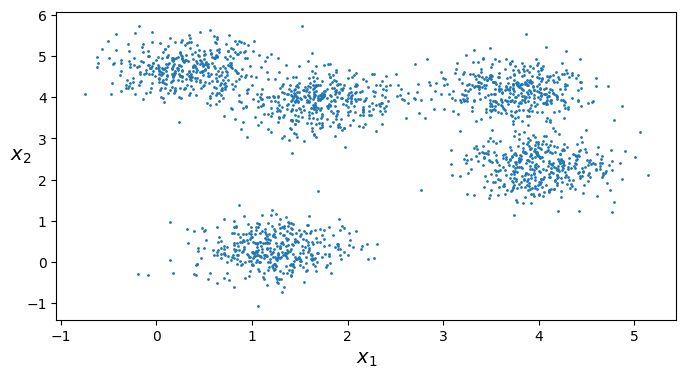

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

### Graficamos los datos generados pero ahora juntamente con los centroides ya entrenados.

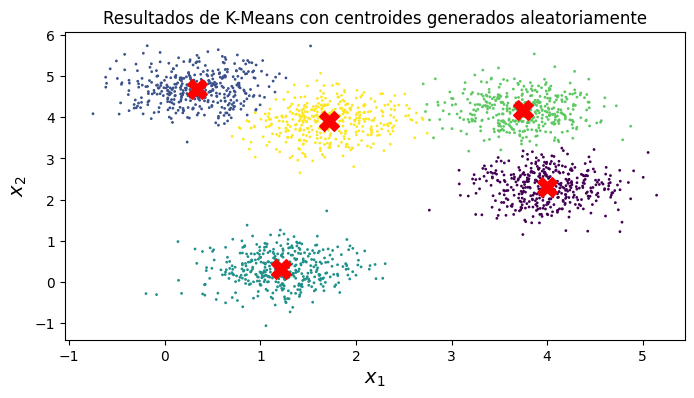

array([2, 4, 0, ..., 3, 0, 4], dtype=int32)

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=num_centroids, random_state=42)
y_pred = kmeans.fit_predict(X)

# Visualizar los resultados
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, color='red', marker='X')  # Mostrar los centroides
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.title("Resultados de K-Means con centroides generados aleatoriamente")
plt.show()
y_pred


In [6]:
# Centroides ya entrenados.
kmeans.cluster_centers_

array([[4.00068016, 2.31422754],
       [0.33388979, 4.6961881 ],
       [1.2164974 , 0.30910509],
       [3.74235461, 4.1799549 ],
       [1.7193813 , 3.89963312]])

### Graficamos las fronteras de decision entre clusters, esto para ver como fue la division del espacio.

In [7]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=10, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=10,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [8]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()*/

SyntaxError: invalid syntax (445132900.py, line 3)

### Entrenamos tres modelos K-Means con 1, 2 y 3 iteraciones, usando k-means++ y el algoritmo elkan para comparar los resultados de cada iteración.

In [ ]:

kmeans_iter1 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                      algorithm="elkan", max_iter=1, random_state=1)

kmeans_iter2 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=2, random_state=1)


kmeans_iter3 = KMeans(n_clusters=num_centroids, init="k-means++", n_init=1,
                     algorithm="elkan", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='elkan', max_iter=3, n_clusters=4, n_init=1, random_state=1)

### Graficamos la evolucion del algoritmo K-Means durante las 3 interaciones que hicimos anteriormente. Esto para asi ver cómo los centroides y las fronteras de decisión cambian conforme el algoritmo ajusta los grupos

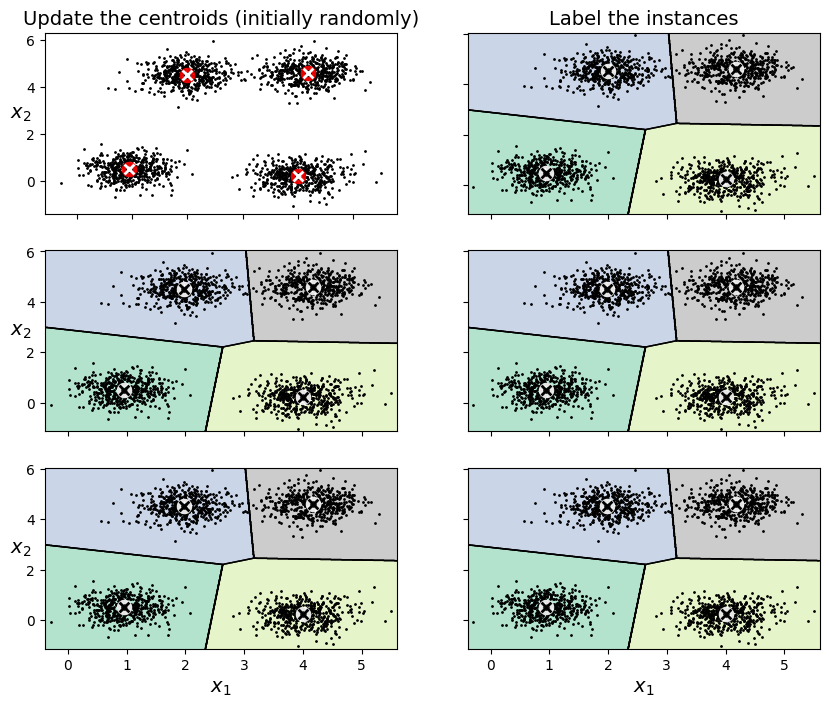

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

### Lo que haremos ahora sera comparar 2 modelos K-Means con diferentes inicializaciones aleatorias, mostrando sus respectivas fronteras de decisión. Esto permite observar cómo afecta la inicialización a los resultados del clustering.

In [ ]:
# Función para comparar dos modelos de clustering K-Means en el mismo conjunto de datos
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    # Entrena el primer modelo en los datos X
    clusterer1.fit(X)
    # Entrena el segundo modelo en los datos X
    clusterer2.fit(X)

    # Configuración del tamaño de la figura para las gráficas
    plt.figure(figsize=(10, 3.2))

    # Primer subplot: gráfica de las fronteras de decisión del primer modelo
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)  # Función que grafica las fronteras del clusterer
    if title1:
        plt.title(title1, fontsize=14)  # Añade el título si se proporciona uno

    # Segundo subplot: gráfica de las fronteras de decisión del segundo modelo
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)  # Sin etiquetas de eje Y
    if title2:
        plt.title(title2, fontsize=14)  # Añade el título si se proporciona uno

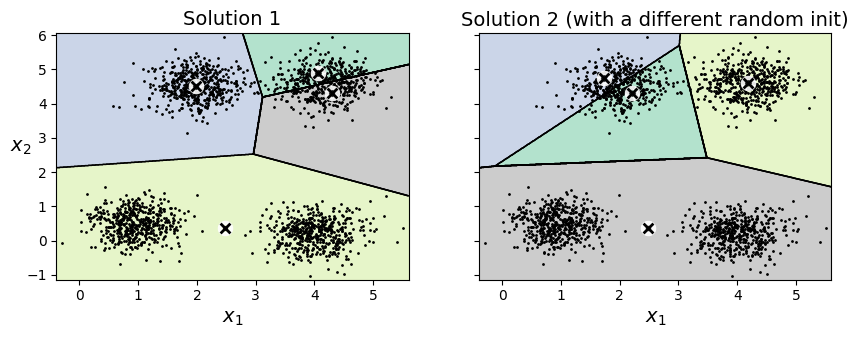

In [ ]:
# Configuración de dos modelos K-Means con diferentes inicializaciones aleatorias
kmeans_rnd_init1 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=num_centroids, init="random", n_init=1,
                          algorithm="elkan", random_state=19)

# Comparación visual de los dos modelos con diferentes inicializaciones
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

# Muestra las gráficas
plt.show()

### Procedemos a entrenar un modelo K-Means utilizando 10 inicializaciones aleatorias y visualiza las fronteras de decisión del clustering. Esto ayuda a observar la estabilidad y la variabilidad en los resultados del agrupamiento.

In [ ]:
# Configuración de un modelo K-Means con 10 inicializaciones aleatorias
kmeans_rnd_10_inits = KMeans(n_clusters=num_centroids, init="random", n_init=10,
                              algorithm="elkan", random_state=11)

# Entrena el modelo K-Means en los datos X
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='elkan', init='random', n_clusters=4, n_init=10,
       random_state=11)

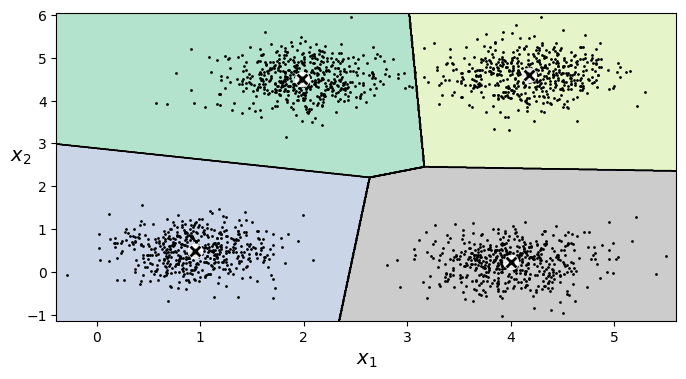

In [ ]:
# Configuración de la figura para la visualización de las fronteras de decisión
plt.figure(figsize=(8, 4))
# Función que grafica las fronteras de decisión del modelo K-Means
plot_decision_boundaries(kmeans_rnd_10_inits, X)

# Muestra la gráfica generada
plt.show()

### Mostramos el Silhouette Score para evaluar la calidad del clustering generado por el modelo K-Means. Un valor más alto indica que los clusters están bien definidos y son distintos entre sí.

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

np.float64(0.5854381966570984)

### Graficamos el Silhuette Score para diferentes valores de k (número de clusters) en el rango de 2 a 20. La gráfica resultante ayuda a identificar el número óptimo de clusters para el modelo K-Means, donde un índice de silueta más alto indica una mejor calidad de agrupamiento.

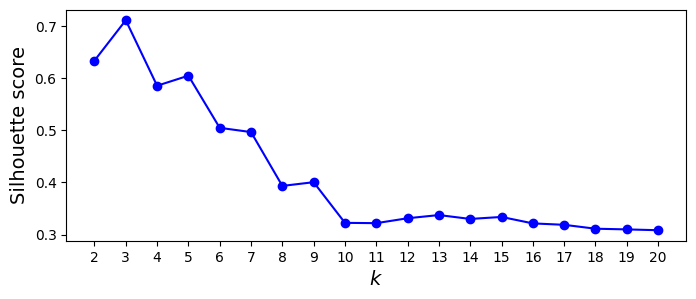

In [ ]:
# Calcula los modelos y las puntuaciones de silueta para k desde 2 hasta 20
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)  # Ajusta K-Means para cada k
                for k in range(2, 21)]  # Rango modificado para k=2 a k=20

# Calcula el índice de silueta para cada modelo entrenado
silhouette_scores = [silhouette_score(X, model.labels_)  # Obtiene etiquetas de cada modelo
                     for model in kmeans_per_k]

# Configuración de la figura para la gráfica del índice de silueta
plt.figure(figsize=(8, 3))
# Grafica el índice de silueta en función del número de clusters k
plt.plot(range(2, 21), silhouette_scores, "bo-")  # Rango modificado para la gráfica
plt.xlabel("$k$", fontsize=14)  # Etiqueta del eje X
plt.ylabel("Silhouette score", fontsize=14)  # Etiqueta del eje Y
# Ajusta los ticks del eje X para mostrar valores de k desde 2 hasta 20
plt.xticks(np.arange(2, 21, 1))  # Crea ticks desde 2 hasta 20 con paso de 1
plt.show()  # Muestra la gráfica

### Generamos graficos de coeficientes de silueta para diferentes valores de k (número de clusters) en el modelo K-Means. Cada gráfico muestra la distribución de los coeficientes de silueta por cluster, lo que permite visualizar la calidad del agrupamiento para cada valor de k.

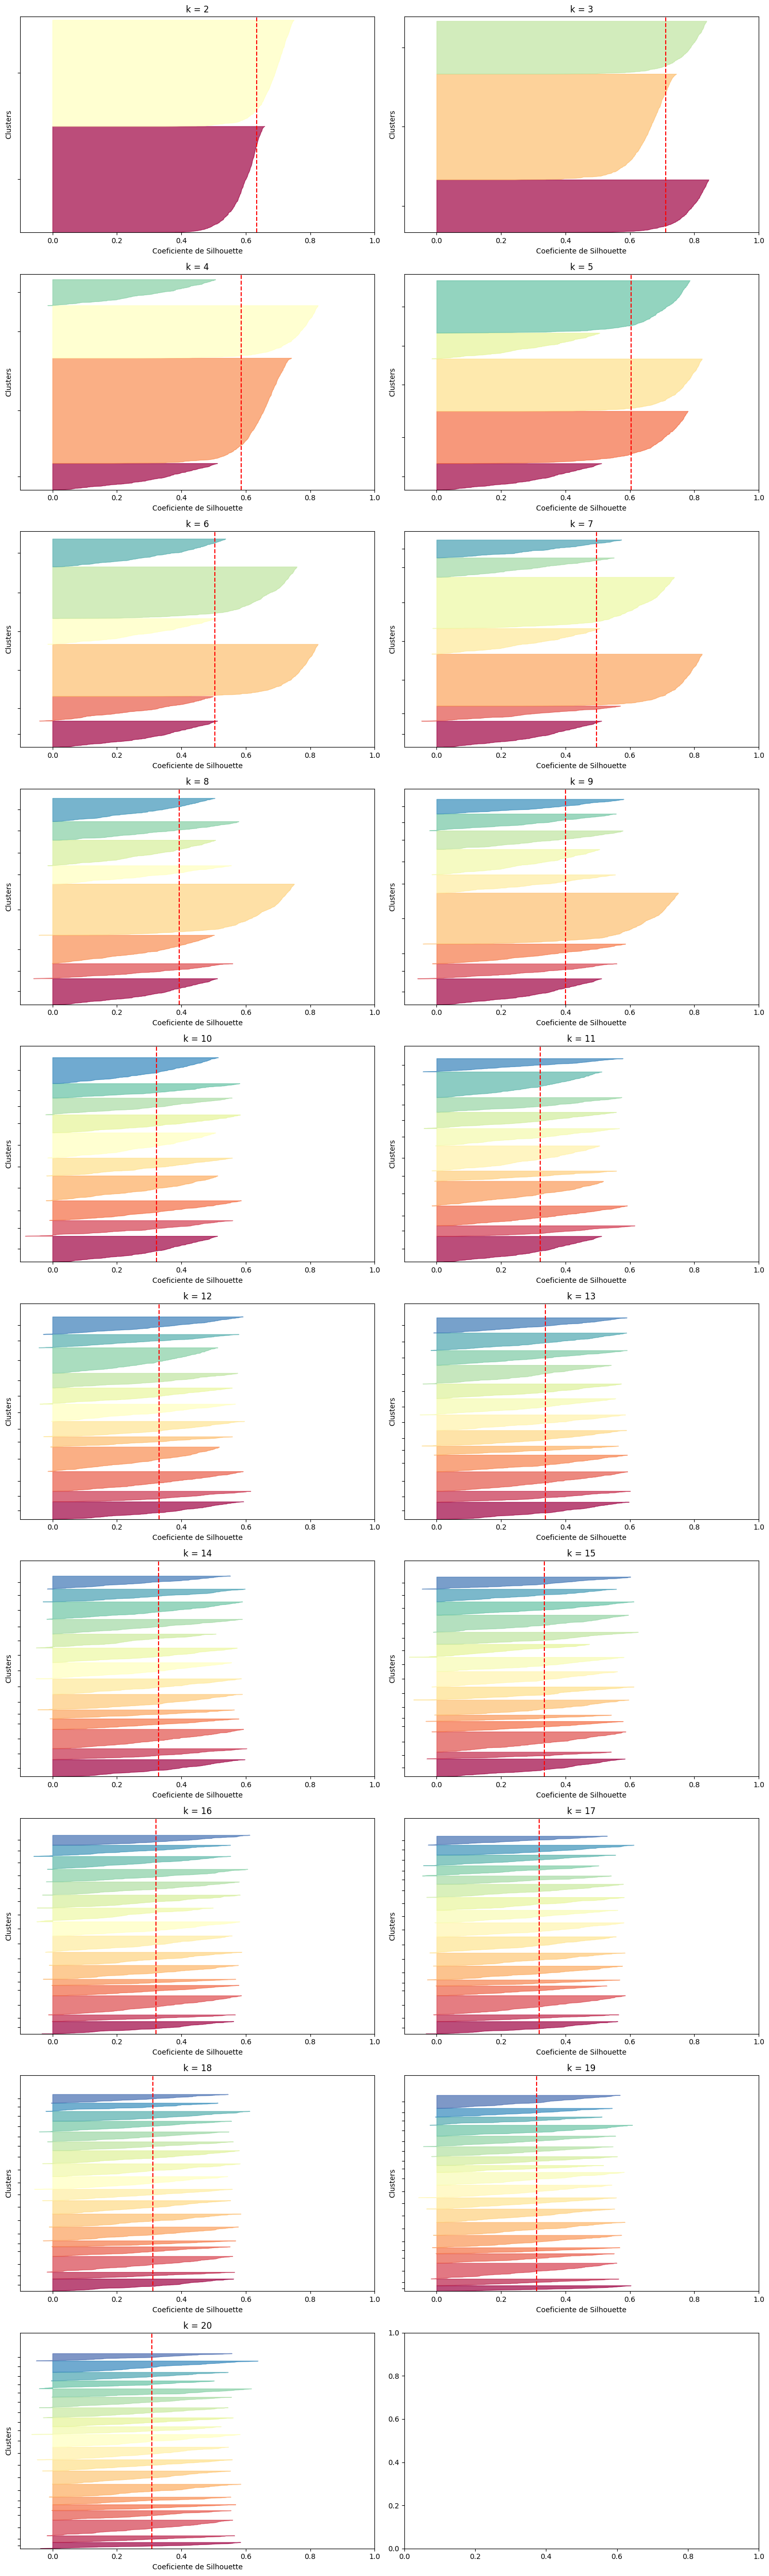

In [ ]:
# Importa las métricas necesarias para calcular los coeficientes de silueta
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que ya tienes kmeans_per_k y silhouette_scores calculados

# Obtener el rango de valores de k
k_values = range(2, len(kmeans_per_k) + 2)  # k empieza en 2

# Crear subplots para cada valor de k
num_plots = len(k_values)
num_rows = int(np.ceil(num_plots / 2))  # Calcula el número de filas para subplots
num_cols = 2  # Dos columnas de subplots

# Crea la figura y los subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.subplots_adjust(hspace=0.4)  # Ajusta el espacio entre subplots

# Iterar sobre los valores de k y crear gráficos de silueta
for i, k in enumerate(k_values):
    ax = axes[i // num_cols, i % num_cols]  # Obtiene el subplot actual
    y_pred = kmeans_per_k[i].labels_  # Obtiene las etiquetas del modelo K-Means
    silhouette_vals = silhouette_samples(X, y_pred)  # Calcula los coeficientes de silueta

    y_ticks = []
    y_lower, y_upper = 0, 0  # Inicializa límites para los clusters
    for cluster in range(k):
        # Extrae y ordena los coeficientes de silueta para cada cluster
        cluster_silhouette_vals = silhouette_vals[y_pred == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)  # Actualiza el límite superior
        color = mpl.cm.Spectral(cluster / k)  # Asigna color basado en el cluster
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         facecolor=color, edgecolor=color, alpha=0.7)  # Grafica el área del cluster
        y_ticks.append((y_lower + y_upper) / 2)  # Añade tick al eje Y
        y_lower = y_upper  # Actualiza el límite inferior

    # Dibuja una línea vertical indicando el promedio del coeficiente de silueta
    ax.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    ax.set_yticks(y_ticks)  # Establece los ticks en el eje Y
    ax.set_yticklabels([])  # Elimina las etiquetas del eje Y
    ax.set_xlim([-0.1, 1])  # Establece límites en el eje X
    ax.set_ylim([0, len(X) + (k + 1) * 10])  # Establece límites en el eje Y
    ax.set_title(f"k = {k}")  # Título del subplot
    ax.set_xlabel("Coeficiente de Silhouette")  # Etiqueta del eje X
    ax.set_ylabel("Clusters")  # Etiqueta del eje Y

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()  # Muestra la figura


### Demostración de la efectividad del modelo.

In [ ]:
# Mostrar el índice de silueta
print(f'Índice de Silueta: {silhouette_score(X, kmeans.labels_)}')

Índice de Silueta: 0.5854381966570984


### Este valor está entre 0 y 1, donde valores cercanos a 1 (valor > 0.5) indican que los puntos están bien agrupados y distanciados de otros clusters.

### Punto 2.
#### Aplicar aprendizaje semisupervisado.

#### Cargamos y Preprocesamos las Imágenes.
#### Importamos las librerías necesarias, definimos la ruta de acceso a las imágenes, y cargamos las primeras 1000 imágenes desde el directorio especificado. Además, se redimensionan y normalizan las imágenes para prepararlas para el análisis.

In [ ]:
# Importar las librerías necesarias
import os  # Para manejar rutas de archivos
from PIL import Image  # Para manipular imágenes
import numpy as np  # Para operaciones numéricas
import pandas as pd  # Para manipulación de datos
from sklearn.model_selection import train_test_split  # Para dividir el dataset

# Define las rutas de acceso a las imágenes
IMAGES_PATH = 'img_align_celeba/img_align_celeba'

# Cargar los nombres de las imágenes directamente desde la carpeta
image_names = [img for img in os.listdir(IMAGES_PATH) if img.endswith('.jpg')]  # Asegúrate de ajustar la extensión según sea necesario

# Seleccionar las primeras 1000 imágenes
image_names = image_names[:1000]

# Función para cargar y preprocesar imágenes
def load_image(img_name, target_size=(64, 64)):
    # Abre la imagen, la redimensiona y normaliza los valores de píxeles
    img = Image.open(os.path.join(IMAGES_PATH, img_name)).resize(target_size)
    return np.array(img) / 255.0  # Normaliza la imagen a un rango de 0 a 1

# Cargar y preprocesar las imágenes
X = np.array([load_image(img) for img in image_names])  # Carga y preprocesa las imágenes

# Imprimir información sobre las imágenes cargadas
print(f"Número de imágenes cargadas: {X.shape[0]}")
print(f"Dimensiones de las imágenes: {X.shape[1:]}")


Número de imágenes cargadas: 1000
Dimensiones de las imágenes: (64, 64, 3)


#### Aplicación de K-Means.
#### Aplanamos las imágenes cargadas, convirtiéndolas en vectores unidimensionales. Luego, se define el número de clusters deseados y se aplica el algoritmo K-Means para ajustar el modelo a los datos, permitiendo agrupar las imágenes según características similares.

In [ ]:
from sklearn.cluster import KMeans  # Importa el modelo K-Means de la biblioteca sklearn

# Aplanar las imágenes para usarlas con K-Means
X_flat = X.reshape(X.shape[0], -1)  # Convierte cada imagen 2D en un vector 1D

k = 10  # Define el número de clusters que se desea encontrar
kmeans = KMeans(n_clusters=k, random_state=42)  # Inicializa el modelo K-Means
kmeans.fit(X_flat)  # Ajusta el modelo a los datos


KMeans(n_clusters=10, random_state=42)

#### Seleccionamos las Imágenes más representativas pos Cluster
#### Se determinan los índices de las imágenes más cercanas a cada centroide de cluster utilizando la distancia mínima. Luego, se extraen las imágenes representativas de cada cluster basado en esos índices, lo que permite visualizar ejemplos clave de cada grupo formado por el algoritmo K-Means.

In [ ]:
# Encuentra los índices de las imágenes más cercanas a cada centroide de cluster
idxs = np.argmin(kmeans.transform(X_flat), axis=0)  # Índices de las imágenes representativas para cada cluster

# Extrae las imágenes representativas utilizando los índices encontrados
X_representative_images = X[idxs]  # Imágenes representativas por cluster


#### Visualización de Imágenes Representativas por Cluster

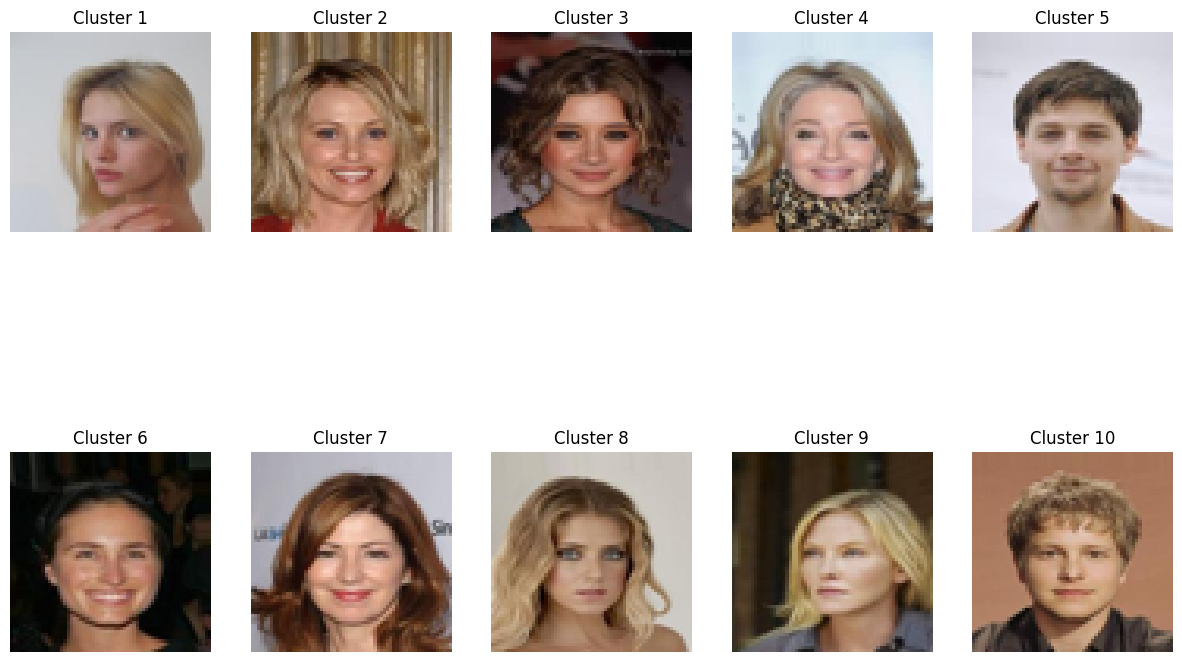

In [ ]:
import matplotlib.pyplot as plt  # Importa la biblioteca para la visualización

# Crea una figura para mostrar las imágenes representativas
plt.figure(figsize=(15, 10))  # Establece el tamaño de la figura

# Itera sobre las imágenes representativas y su índice
for i, img in enumerate(X_representative_images):
    plt.subplot(2, 5, i + 1)  # Crea un subgráfico para cada imagen (5 filas y 10 columnas)
    plt.imshow(img)  # Muestra la imagen en el subgráfico
    plt.axis('off')  # Desactiva los ejes para una mejor visualización
    plt.title(f"Cluster {i+1}")  # Asigna un título al subgráfico indicando el número del cluster

# Muestra la figura con todas las imágenes
plt.show()



#### Definición de Etiquetas para los Clusters
#### Definimos manualmente las etiquetas asociadas a cada cluster, basándonos en la observación de las imágenes representativas. Las etiquetas describen características específicas que se han identificado en las imágenes de cada grupo, permitiendo una interpretación más clara de los resultados del clustering.

In [ ]:
# Etiquetas manuales (ajusta esto según lo que observes en las imágenes representativas)
y_labels = ['ojos verdes','dientes perfecto','sonrojada','con bufanda','barba chivito','muy sonriente','vieja','ojos gigantes','muy enojada','nerd']


#### Visualización de Imágenes Representativas por Cluster junto con su etiqueta.

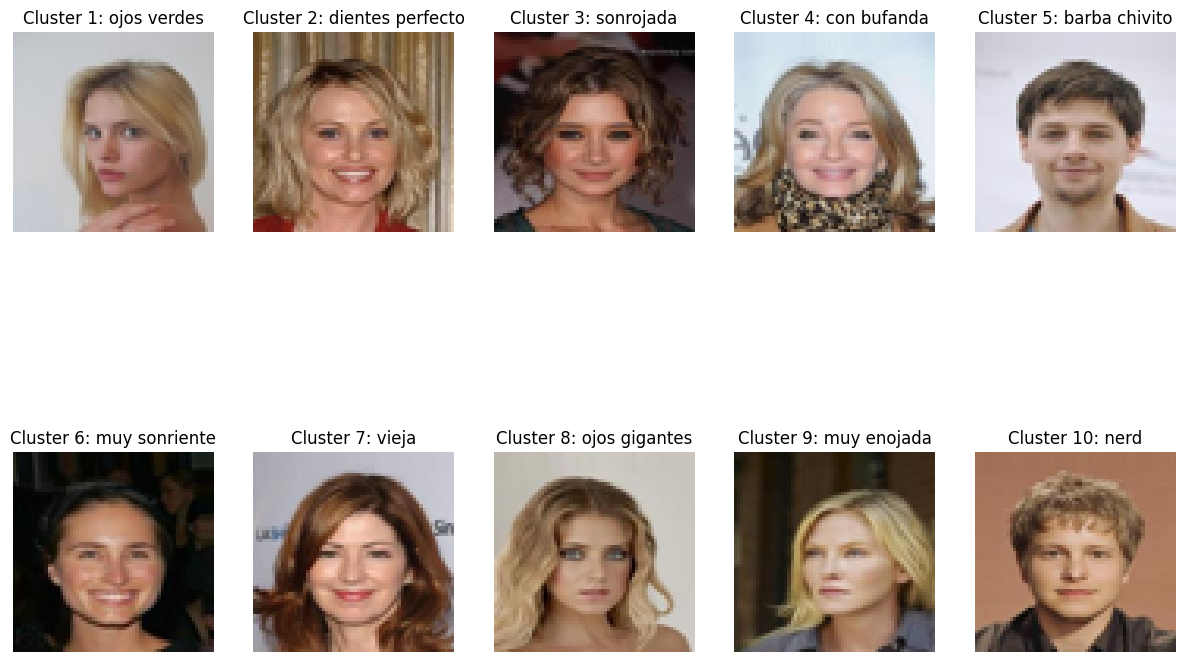

In [ ]:
import matplotlib.pyplot as plt  # Importa la biblioteca para la visualización

# Crea una figura para mostrar las imágenes representativas
plt.figure(figsize=(15, 10))  # Establece el tamaño de la figura

# Itera sobre las imágenes representativas y su índice
for i, img in enumerate(X_representative_images):
    plt.subplot(2, 5, i + 1)  # Crea un subgráfico para cada imagen (5 filas y 10 columnas)
    plt.imshow(img)  # Muestra la imagen en el subgráfico
    plt.axis('off')  # Desactiva los ejes para una mejor visualización
    plt.title(f"Cluster {i+1}: {y_labels[i]}")  # Asigna un título al subgráfico

# Muestra la figura con todas las imágenes
plt.show()


#### Asignación de Etiquetas a los Clusters
#### Creamos un DataFrame para asociar las etiquetas manuales a los clusters generados por K-Means. Las etiquetas se asignan a cada imagen según su cluster correspondiente, permitiendo verificar y visualizar fácilmente las primeras asignaciones de etiquetas.

In [ ]:
cluster_labels = kmeans.labels_

In [ ]:
# Crear un DataFrame para asociar las etiquetas a los clusters
label_mapping = {i: y_labels[i] for i in range(k)}

In [ ]:
# Asignar las etiquetas manuales a cada imagen según el cluster
y_mapped = np.array([label_mapping[label] for label in cluster_labels])

# Verifica las primeras 10 asignaciones de etiquetas
print(y_mapped[:10])  # Muestra las primeras 10 etiquetas asignadas

['nerd' 'dientes perfecto' 'ojos gigantes' 'muy sonriente' 'ojos gigantes'
 'con bufanda' 'barba chivito' 'muy enojada' 'dientes perfecto'
 'sonrojada']


In [ ]:
label_mapping

{0: 'ojos verdes',
 1: 'dientes perfecto',
 2: 'sonrojada',
 3: 'con bufanda',
 4: 'barba chivito',
 5: 'muy sonriente',
 6: 'vieja',
 7: 'ojos gigantes',
 8: 'muy enojada',
 9: 'nerd'}

####  División del Conjunto de Datos
####  Dividimos el conjunto de datos de imágenes aplanadas y sus etiquetas en conjuntos de entrenamiento y prueba, asignando el 80% de los datos a entrenamiento y el 20% a prueba. Esto permite evaluar el rendimiento del modelo de clasificación en datos no vistos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, y_mapped, test_size=0.2, random_state=42)


In [ ]:
print(X_train.shape)

(800, 12288)


#### Entrenamos un modelo de Regresion Logistica.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Verificar la forma de los datos
print(f"Forma de X_train antes de ajustar: {X_train.shape}")

# Asegurarse de que X_train y X_test están aplanados en 2D
if X_train.ndim > 2:
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)

print(f"Forma de X_train después de ajustar: {X_train.shape}")

# Crear el modelo RL
log_reg_ovr =OneVsRestClassifier(LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42))

# Entrenar el modelo
log_reg_ovr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = log_reg_ovr.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo One-vs-Rest con regresión logística: {accuracy * 100:.2f}%")


Forma de X_train antes de ajustar: (800, 12288)
Forma de X_train después de ajustar: (800, 12288)


Precisión del modelo One-vs-Rest con regresión logística: 60.00%


#### Aprendizaje Activo

#### Obtención de Probabilidades de Predicción y Ordenamiento por Confianza
#### Obtenemos las probabilidades de predicción del modelo de regresión logística para las primeras 1000 imágenes. Luego, identifica las etiquetas con mayor probabilidad y las organiza en función de su confianza, mostrando las 10 predicciones con menor confianza. Esto permite analizar las predicciones en las que el modelo tiene menos certeza.

In [ ]:
# Obtener las probabilidades de predicción del modelo
probas = log_reg_ovr.predict_proba(X_flat[:1000])  # Obtiene las probabilidades de predicción para las primeras 1000 imágenes

# Obtener las etiquetas con la mayor probabilidad y sus índices
labels_ixs = np.argmax(probas, axis=1)  # Encuentra los índices de las etiquetas con la mayor probabilidad
confidences = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])  # Obtiene las probabilidades correspondientes

# Ordenar por menor confianza
sorted_ixs = np.argsort(confidences)  # Ordena los índices de las confianzas de menor a mayor

print("Confianzas más bajas:", confidences[sorted_ixs[:10]])  # Muestra las 10 confianzas más bajas


Confianzas más bajas: [0.34101932 0.36188691 0.4075323  0.41090799 0.41251818 0.41699952
 0.42079668 0.42319108 0.42540791 0.43788392]


In [ ]:
# Importar las librerías necesarias
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#### Visualización de Imágenes con Menor Confianza de Predicción

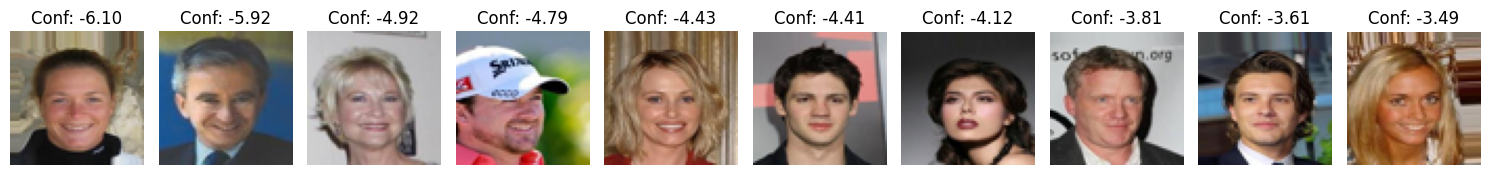

In [ ]:
# Mostrar imágenes con menor confianza
import math


confidences = log_reg_ovr.decision_function(X_test)
# Obtener las puntuaciones máximas de confianza para cada imagen
max_confidences = np.max(confidences, axis=1)  # Encuentra la confianza máxima para cada imagen
sorted_ixs = np.argsort(max_confidences)  # Ordenar los índices de acuerdo con las confianzas

# Función para mostrar imágenes con menor confianza
def show_low_confidence_images(X_lowest_confidence, confidences, sorted_ixs, max_images=40):
    num_images = min(len(X_lowest_confidence), max_images)
    cols = 10
    rows = math.ceil(num_images / cols)
    plt.figure(figsize=(15, rows * 2))
    for i in range(num_images):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(X_lowest_confidence[i].reshape(64, 64, 3))  # Volver a dar forma a la imagen
        plt.title(f"Conf: {max_confidences[sorted_ixs[i]]:.2f}")  # Usar max_confidences
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Obtener las imágenes con menor confianza
X_lowest_confidence = X_test[sorted_ixs[:k]]  # Asegúrate de usar X_test aquí

# Mostrar las imágenes con menor confianza
show_low_confidence_images(X_lowest_confidence, max_confidences, sorted_ixs)


#### Obtención de Etiquetas Reales para Imágenes con Menor Confianza
####  Imprimimos las etiquetas reales de las imágenes en las que el modelo tuvo menor confianza en sus predicciones. Esto permite comparar las predicciones inciertas con sus etiquetas reales y entender mejor los posibles errores o inconsistencias del modelo en estos casos específicos.

In [ ]:
# Obtener las etiquetas reales de las imágenes con menor confianza
y_lowest = y_train[sorted_ixs[:k]]  # Selecciona las etiquetas correspondientes a las imágenes de menor confianza
print("Etiquetas reales de las imágenes con menor confianza:", y_lowest)  # Imprime las etiquetas


Etiquetas reales de las imágenes con menor confianza: ['nerd' 'nerd' 'sonrojada' 'barba chivito' 'sonrojada' 'nerd' 'sonrojada'
 'sonrojada' 'ojos verdes' 'barba chivito']


#### Ajuste de Etiquetas Propagadas con Etiquetas Reales
#### Creamos una copia de las etiquetas propagadas y reemplaza las etiquetas de menor confianza con sus etiquetas reales correspondientes. Esto permite mejorar la calidad de las etiquetas en el conjunto de entrenamiento, combinando predicciones con conocimientos reales en casos específicos.

In [ ]:
# Crear una copia de las etiquetas propagadas
y_train2 = y_mapped[:1000].copy()

# Ajustar las etiquetas propagadas con las etiquetas reales
y_train2[sorted_ixs[:k]] = y_lowest

#### Entrenamiento y Evaluación de Modelo OneVsRest con Regresión Logística
#### Implementamos un clasificador OneVsRest utilizando regresión logística. Mide el tiempo de entrenamiento en un subconjunto de datos y luego evalúa la precisión del modelo en el conjunto de prueba, proporcionando una métrica clave para medir su rendimiento.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
import time

# Crear el modelo OneVsRest con regresión logística
log_reg5 = OneVsRestClassifier(
    LogisticRegression(solver="lbfgs", max_iter=5000, random_state=42)
)

# Medir el tiempo de entrenamiento
start_time = time.time()
log_reg5.fit(X_flat[:1000], y_train2)  # Entrenar el modelo con un subconjunto de datos
print(f"Tiempo de entrenamiento: {time.time() - start_time:.2f} segundos")  # Imprimir el tiempo transcurrido

# Evaluar la precisión del modelo ajustado
accuracy = log_reg5.score(X_test, y_test)  # Evaluar precisión en el conjunto de prueba
print(f"Precisión del modelo ajustado: {accuracy * 100:.2f}%")  # Imprimir precisión


Tiempo de entrenamiento: 53.77 segundos
Precisión del modelo ajustado: 99.00%
